Problem Statement:
So, our assignment for this week would be to just apply what we learnt last week. Take last 10 years weekly data for any 3 firms of your choice and predict their Adj Close price using any 5 ML models. Now there's a lot for you guys to explore here:

Understand what each detail from the historical data means ( you can grab the data from yahoo finance website)
Ponder over what could be the best features to choose in order to make your predictions more accurate (hint: you could always refer to some research papers)
Explore ML models (hint: Explore scikit library)
Explore error metrics (hint : search what's MAE, RMSE, R2 etc.)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Path of the file to read
df_path = "./data/VTI.csv"

df = pd.read_csv(df_path)
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-25,107.510002,107.660004,107.250000,107.470001,96.942802,1820300
1,2015-11-27,107.589996,107.760002,107.220001,107.629997,97.087128,552400
2,2015-11-30,107.779999,107.849998,107.110001,107.169998,96.672195,3618100
3,2015-12-01,107.589996,108.209999,107.370003,108.180000,97.583282,2443600
4,2015-12-02,108.099998,108.269997,106.879997,107.050003,96.563965,2937200


In [2]:
#Convert the date column to datetime as it is in string
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

#Column headers to lower
df.columns = [str(col).lower().replace(' ', '_') for col in df.columns]

# Get month of each sample
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,open,high,low,close,adj_close,volume,month,year
0,2015-11-25,107.510002,107.660004,107.250000,107.470001,96.942802,1820300,11,2015
1,2015-11-27,107.589996,107.760002,107.220001,107.629997,97.087128,552400,11,2015
2,2015-11-30,107.779999,107.849998,107.110001,107.169998,96.672195,3618100,11,2015
3,2015-12-01,107.589996,108.209999,107.370003,108.180000,97.583282,2443600,12,2015
4,2015-12-02,108.099998,108.269997,106.879997,107.050003,96.563965,2937200,12,2015


In [3]:
X = df.drop(['adj_close','date'], axis=1);
y = df.adj_close

#Split data by default splitting

train_X, val_X, train_y, val_y = train_test_split(X, y,shuffle=False)


In [4]:
DTR_model = DecisionTreeRegressor(random_state = 1)
DTR_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [5]:
val_predictions = DTR_model.predict(val_X)
#val_predictions

In [6]:
# print the top few validation predictions
print(DTR_model.predict(val_X.head()))
# print the top few actual prices from validation data
print(val_y.head())

[133.983475 132.673141 130.768738 129.042435 130.438766]
565    134.190918
566    132.503403
567    131.042160
568    129.486603
569    130.325653
Name: adj_close, dtype: float64


In [7]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

1.598590925925929


In [8]:
#Model 2 linear regressor
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(train_X, train_y)


LinearRegression()

In [9]:
val_predictions = LR_model.predict(val_X)
val_mae =  mean_absolute_error(val_y, val_predictions)
print(val_mae)

0.36480330174238434


In [10]:
val_preds = pd.DataFrame({'predictions': val_predictions})
val_preds.index += 565
print(val_preds)

     predictions
565   134.100443
566   132.446210
567   130.989846
568   129.656207
569   130.431308
..           ...
749   132.996771
750   133.249788
751   131.003745
752   128.750764
753   129.361006

[189 rows x 1 columns]


### Plot for the linear regressor model

In [11]:
val_df = val_X.copy().join(val_y)
val_df = val_df.join(val_preds)
val_df = val_df.join(df['date'])
val_df

,open,high,low,close,volume,month,year,adj_close,predictions,date
565,141.500000,142.410004,141.039993,142.339996,1765700,2,2018,134.190918,134.100443,2018-02-26
566,142.410004,142.860001,140.550003,140.550003,2305100,2,2018,132.503403,132.446210,2018-02-27
567,141.179993,141.399994,138.970001,139.000000,2290500,2,2018,131.042160,130.989846,2018-02-28
568,139.070007,139.880005,136.399994,137.350006,4846700,3,2018,129.486603,129.656207,2018-03-01
569,136.279999,138.509995,135.830002,138.240005,3021300,3,2018,130.325653,130.431308,2018-03-02
...,...,...,...,...,...,...,...,...,...,...
749,137.550003,140.009995,136.699997,139.779999,3600900,11,2018,133.507797,132.996771,2018-11-15
750,139.070007,140.570007,138.820007,140.080002,2272300,11,2018,133.794312,133.249788,2018-11-16
751,139.830002,139.929993,137.169998,137.649994,3481800,11,2018,131.473358,131.003745,2018-11-19
752,135.729996,136.619995,134.639999,135.199997,4627200,11,2018,129.133286,128.750764,2018-11-20


Text(0, 0.5, 'USD')

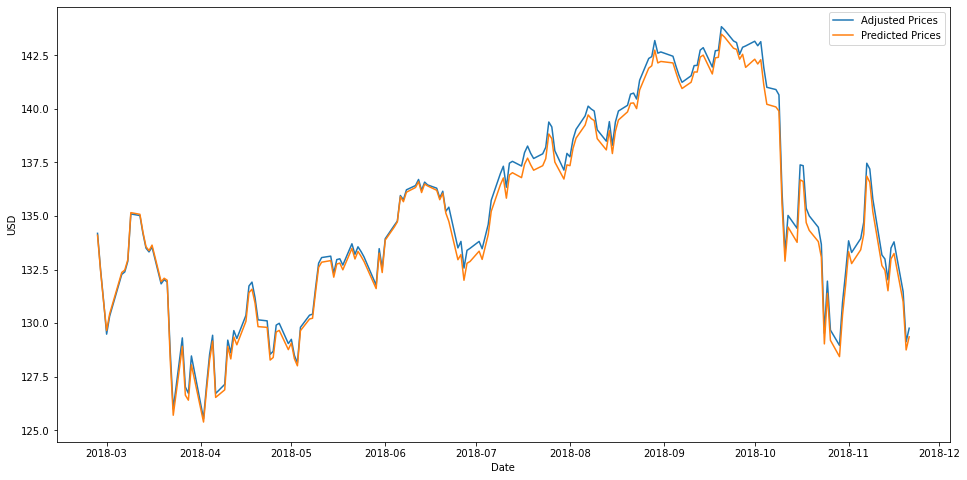

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

val_df.index = val_df['date']
plt.figure(figsize=(16,8))


plt.plot(val_df['adj_close'])
plt.plot(val_df['predictions'])

plt.legend(['Adjusted Prices','Predicted Prices'])
plt.xlabel("Date")
plt.ylabel("USD")

In [13]:
#model 3
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(train_X, train_y)
val_predictions = RF_model.predict(val_X)

In [14]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

1.6341012342328247


In [15]:
train_y.head()

0    96.942802
1    97.087128
2    96.672195
3    97.583282
4    96.563965
Name: adj_close, dtype: float64

In [16]:
#model 4 Support vector machines regressor
from sklearn import datasets
from sklearn.svm import SVR

SVR_model = SVR()
SVR_model.fit(train_X, train_y)
val_predictions = SVR_model.predict(val_X)

In [17]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

26.34315941697093


In [18]:
#model 5 Support Elastic net
from sklearn.linear_model import ElasticNet

EN_model = ElasticNet(max_iter = 1000)
EN_model.fit(train_X, train_y)
val_predictions = EN_model.predict(val_X)

In [19]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

0.9082958461636623


## Company 2  Google

In [20]:
# Path of the file to read
df_path = "./data/GOOG.csv"

df = pd.read_csv(df_path)
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-28,290.411469,296.483704,289.783813,294.795044,294.795044,9320003
1,2011-04-04,295.392792,296.259552,281.783813,288.000488,288.000488,30521174
2,2011-04-11,287.024170,288.643097,264.040314,264.359131,264.359131,51217659
3,2011-04-18,262.227112,264.448792,258.530975,261.569580,261.569580,26607358
4,2011-04-25,261.644287,271.034088,260.030334,271.034088,271.034088,27417785


In [21]:
#Convert the date column to datetime as it is in string
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

#Column headers to lower
df.columns = [str(col).lower().replace(' ', '_') for col in df.columns]


# Get month of each sample
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,open,high,low,close,adj_close,volume,month,year
0,2011-03-28,290.411469,296.483704,289.783813,294.795044,294.795044,9320003,3,2011
1,2011-04-04,295.392792,296.259552,281.783813,288.000488,288.000488,30521174,4,2011
2,2011-04-11,287.024170,288.643097,264.040314,264.359131,264.359131,51217659,4,2011
3,2011-04-18,262.227112,264.448792,258.530975,261.569580,261.569580,26607358,4,2011
4,2011-04-25,261.644287,271.034088,260.030334,271.034088,271.034088,27417785,4,2011


In [22]:
X = df.drop(['adj_close','date'], axis=1);
y = df.adj_close

#Split data by default splitting

train_X, val_X, train_y, val_y = train_test_split(X, y, shuffle = False)


In [23]:
# Model 1
DTR_model = DecisionTreeRegressor(random_state = 1)
DTR_model.fit(train_X, train_y)
val_predictions = DTR_model.predict(val_X)

#print(DTR_model.predict(val_X.head()))
# print the top few actual prices from validation data
#print(val_y.head())

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

186.8301559618321


In [24]:
#Model 2 linear regressor

LR_model = LinearRegression()
LR_model.fit(train_X, train_y)

val_predictions = LR_model.predict(val_X)
val_mae =  mean_absolute_error(val_y, val_predictions)
print(val_mae)
val_X

7.478163974405842e-12


,open,high,low,close,volume,month,year
392,1199.890015,1209.959961,1145.119995,1157.349976,7695500,10,2018
393,1150.109985,1168.000000,1068.270020,1110.079956,10967100,10,2018
394,1108.910034,1128.989990,1077.089966,1096.459961,8130200,10,2018
395,1103.060059,1112.229980,1034.089966,1071.469971,12078700,10,2018
396,1082.469971,1097.040039,995.830017,1057.790039,12944200,10,2018
...,...,...,...,...,...,...,...
518,2056.520020,2118.110107,2010.000000,2108.540039,8336500,3,2021
519,2101.129883,2128.810059,2021.609985,2061.919922,7578200,3,2021
520,2062.300049,2123.560059,2017.680054,2043.199951,7765000,3,2021
521,2041.839966,2078.209961,2010.729980,2035.550049,7388200,3,2021


In [25]:
#model 3
RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(train_X, train_y)
val_predictions = RF_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

191.81622532969405


In [26]:
#model 4 Support vector machines regressor

SVR_model = SVR()
SVR_model.fit(train_X, train_y)
val_predictions = SVR_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

805.2335057790141


In [27]:
#model 5 Support Elastic net

EN_model = ElasticNet(max_iter = 1000)
EN_model.fit(train_X, train_y)
val_predictions = EN_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)
val_y

5.280106367259454


392    1157.349976
393    1110.079956
394    1096.459961
395    1071.469971
396    1057.790039
          ...     
518    2108.540039
519    2061.919922
520    2043.199951
521    2035.550049
522    2068.629883
Name: adj_close, Length: 131, dtype: float64

In [28]:
val_preds = pd.DataFrame({'predictions': val_predictions})
val_preds.index += 391
print(val_preds)

     predictions
391  1157.138664
392  1104.054051
393  1096.796578
394  1063.260638
395  1044.174142
..           ...
517  2096.344923
518  2057.848965
519  2054.923856
520  2037.925754
521  2071.714068

[131 rows x 1 columns]


In [29]:
val_df = val_X.copy().join(val_y)
val_df = val_df.join(val_preds)
val_df = val_df.join(df['date'])
val_df

,open,high,low,close,volume,month,year,adj_close,predictions,date
392,1199.890015,1209.959961,1145.119995,1157.349976,7695500,10,2018,1157.349976,1104.054051,2018-10-01
393,1150.109985,1168.000000,1068.270020,1110.079956,10967100,10,2018,1110.079956,1096.796578,2018-10-08
394,1108.910034,1128.989990,1077.089966,1096.459961,8130200,10,2018,1096.459961,1063.260638,2018-10-15
395,1103.060059,1112.229980,1034.089966,1071.469971,12078700,10,2018,1071.469971,1044.174142,2018-10-22
396,1082.469971,1097.040039,995.830017,1057.790039,12944200,10,2018,1057.790039,1065.677943,2018-10-29
...,...,...,...,...,...,...,...,...,...,...
518,2056.520020,2118.110107,2010.000000,2108.540039,8336500,3,2021,2108.540039,2057.848965,2021-03-01
519,2101.129883,2128.810059,2021.609985,2061.919922,7578200,3,2021,2061.919922,2054.923856,2021-03-08
520,2062.300049,2123.560059,2017.680054,2043.199951,7765000,3,2021,2043.199951,2037.925754,2021-03-15
521,2041.839966,2078.209961,2010.729980,2035.550049,7388200,3,2021,2035.550049,2071.714068,2021-03-22


Text(0, 0.5, 'USD')

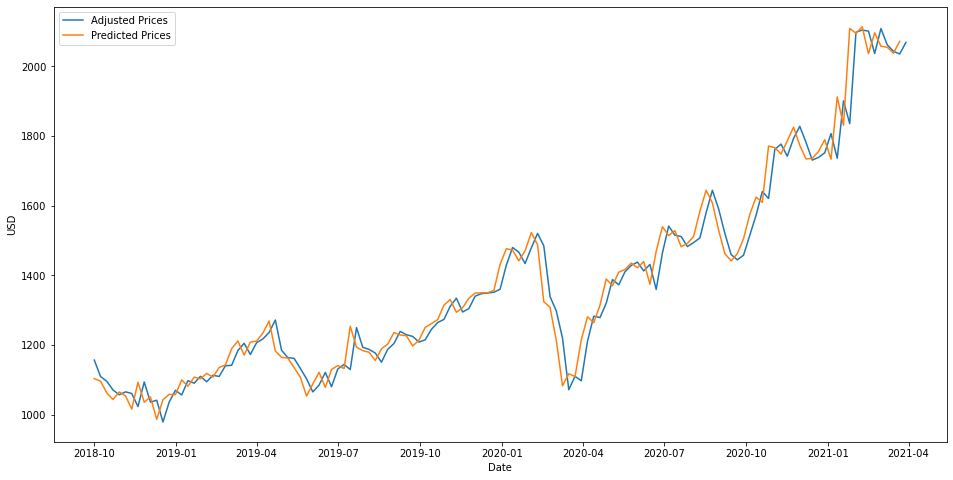

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

val_df.index = val_df['date']
plt.figure(figsize=(16,8))


plt.plot(val_df['adj_close'])
plt.plot(val_df['predictions'])

plt.legend(['Adjusted Prices','Predicted Prices'])
plt.xlabel("Date")
plt.ylabel("USD")

## Company 3

In [31]:
# Path of the file to read
df_path = "./data/AAPL.csv"

df = pd.read_csv(df_path)
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-02,12.490714,12.565357,12.339286,12.380714,10.646210,1761415600
1,2011-05-09,12.423571,12.500000,12.155357,12.160714,10.457034,1470954800
2,2011-05-16,12.114286,12.228929,11.811786,11.972143,10.294883,1836024400
3,2011-05-23,11.784643,12.091429,11.765000,12.050357,10.362135,1425911200
4,2011-05-30,12.182143,12.576071,12.178571,12.265714,10.547321,1624470400


In [32]:
#Convert the date column to datetime as it is in string
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

#Column headers to lower
df.columns = [str(col).lower().replace(' ', '_') for col in df.columns]


# Get month of each sample
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,open,high,low,close,adj_close,volume,month,year
0,2011-05-02,12.490714,12.565357,12.339286,12.380714,10.646210,1761415600,5,2011
1,2011-05-09,12.423571,12.500000,12.155357,12.160714,10.457034,1470954800,5,2011
2,2011-05-16,12.114286,12.228929,11.811786,11.972143,10.294883,1836024400,5,2011
3,2011-05-23,11.784643,12.091429,11.765000,12.050357,10.362135,1425911200,5,2011
4,2011-05-30,12.182143,12.576071,12.178571,12.265714,10.547321,1624470400,5,2011


In [33]:
X = df.drop(['adj_close','date'], axis=1);
y = df.adj_close

#Split data by default splitting

train_X, val_X, train_y, val_y = train_test_split(X, y, shuffle = False)


In [34]:
# Model 1
DTR_model = DecisionTreeRegressor(random_state = 1)
DTR_model.fit(train_X, train_y)
val_predictions = DTR_model.predict(val_X)

#print(DTR_model.predict(val_X.head()))
# print the top few actual prices from validation data
#print(val_y.head())

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

26.788918549618323


In [35]:
#Model 2 linear regressor

LR_model = LinearRegression()
LR_model.fit(train_X, train_y)

val_predictions = LR_model.predict(val_X)
val_mae =  mean_absolute_error(val_y, val_predictions)
print(val_mae)
val_X


2.0862979995290254


,open,high,low,close,volume,month,year
391,54.797501,55.590000,51.357498,51.869999,1082425200,10,2018
392,51.075001,52.529999,49.542500,51.117500,764797600,11,2018
393,49.750000,49.962502,46.482498,48.382500,968906000,11,2018
394,47.500000,47.674999,43.025002,43.072498,657994800,11,2018
395,43.560001,45.700001,42.564999,44.645000,854999600,11,2018
...,...,...,...,...,...,...,...
517,121.650002,124.180000,118.860001,123.000000,359904000,3,2021
518,123.870003,133.039993,123.070000,133.000000,447820500,4,2021
519,132.520004,135.000000,130.630005,134.160004,444178800,4,2021
520,133.509995,135.529999,131.300003,134.320007,421147600,4,2021


In [36]:
val_preds = pd.DataFrame({'predictions': val_predictions})
val_preds.index += 391
print(val_preds)

     predictions
391    49.770605
392    49.129672
393    46.398234
394    41.265529
395    42.938252
..           ...
517   118.653879
518   128.200024
519   129.488010
520   129.638575
521   126.902503

[131 rows x 1 columns]


In [37]:
val_df = val_X.copy().join(val_y)
val_df = val_df.join(val_preds)
val_df = val_df.join(df['date'])
val_df

,open,high,low,close,volume,month,year,adj_close,predictions,date
391,54.797501,55.590000,51.357498,51.869999,1082425200,10,2018,50.327675,49.770605,2018-10-29
392,51.075001,52.529999,49.542500,51.117500,764797600,11,2018,49.597546,49.129672,2018-11-05
393,49.750000,49.962502,46.482498,48.382500,968906000,11,2018,47.107662,46.398234,2018-11-12
394,47.500000,47.674999,43.025002,43.072498,657994800,11,2018,41.937576,41.265529,2018-11-19
395,43.560001,45.700001,42.564999,44.645000,854999600,11,2018,43.468647,42.938252,2018-11-26
...,...,...,...,...,...,...,...,...,...,...
517,121.650002,124.180000,118.860001,123.000000,359904000,3,2021,122.791428,118.653879,2021-03-29
518,123.870003,133.039993,123.070000,133.000000,447820500,4,2021,132.774475,128.200024,2021-04-05
519,132.520004,135.000000,130.630005,134.160004,444178800,4,2021,133.932510,129.488010,2021-04-12
520,133.509995,135.529999,131.300003,134.320007,421147600,4,2021,134.092239,129.638575,2021-04-19


Text(0, 0.5, 'USD')

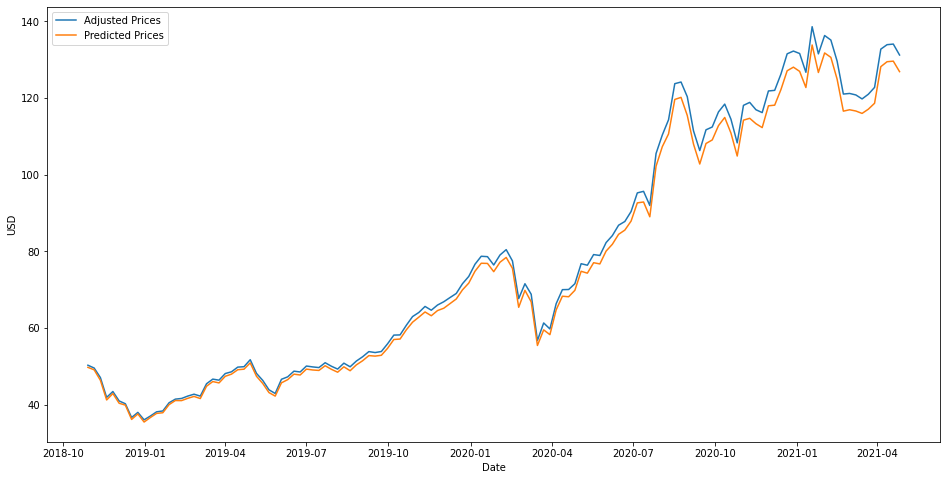

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

val_df.index = val_df['date']
plt.figure(figsize=(16,8))


plt.plot(val_df['adj_close'])
plt.plot(val_df['predictions'])

plt.legend(['Adjusted Prices','Predicted Prices'])
plt.xlabel("Date")
plt.ylabel("USD")

In [39]:
#model 3
RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(train_X, train_y)
val_predictions = RF_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)
val_X

27.17647278297712


,open,high,low,close,volume,month,year
391,54.797501,55.590000,51.357498,51.869999,1082425200,10,2018
392,51.075001,52.529999,49.542500,51.117500,764797600,11,2018
393,49.750000,49.962502,46.482498,48.382500,968906000,11,2018
394,47.500000,47.674999,43.025002,43.072498,657994800,11,2018
395,43.560001,45.700001,42.564999,44.645000,854999600,11,2018
...,...,...,...,...,...,...,...
517,121.650002,124.180000,118.860001,123.000000,359904000,3,2021
518,123.870003,133.039993,123.070000,133.000000,447820500,4,2021
519,132.520004,135.000000,130.630005,134.160004,444178800,4,2021
520,133.509995,135.529999,131.300003,134.320007,421147600,4,2021


In [40]:
#model 4 Support vector machines regressor

SVR_model = SVR()
SVR_model.fit(train_X, train_y)
val_predictions = SVR_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

48.3982151295435


In [41]:
#model 5 Support Elastic net

EN_model = ElasticNet(max_iter = 1000)
EN_model.fit(train_X, train_y)
val_predictions = EN_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

1.6255310071470916
